# Prerequisites
- Lattices

# Theory

## Short Integer Solution def

Let $\text{SIS}_{n, m, q, \beta}$ be a Short Integer Solution problem. We define it as such:

Given $m$ uniformly random vectors $a_i\in\mathbb{Z}^n_q$, forming the columns of a matrix $A∈\mathbb{Z}^{n×m}_q$, find a nonzero integer vector $z∈\mathbb{Z}^m$ of norm $‖z‖ ≤β$ (short) such that
$$f_A(z) = Az = \sum_i a_i \cdot z_i = 0 \in \mathbb{Z}^n_q$$
$$z_1\vec{a_1} + z_2\vec{a_2} +...+ z_m\vec{a_m} = 0$$

**Notes**
- Without the constraint $\beta$ the solution would be as simple as Gaussian elimination.
- $\beta < q$ otherwise $z = (q,0, ..., 0) \in \mathbb{Z}^m$ would be a fine solution
- A solution $z$ for $A$ can be converted to a solution for the extension $[A| A']$ by appending $0$s to $z$ => 
    - big $m$ => easy (the more vectors we are given, the easier the problem becomes)
    - big $n$ => hard  (the more dimension we work in the harder the problem becomes)
- Solution existence is based on parameters set

**q-ary interpretation**

$\text{SIS}$ is an average-case SVP on $m$-dimensional q-ary lattices

$\mathcal{L}^\perp(A) =  \{z \in \mathbb{Z}^m : Az = 0 \in \mathbb{Z}^n_q \}$
- Closed over shifts by $q$ (periodic mod $q$)

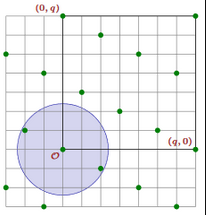
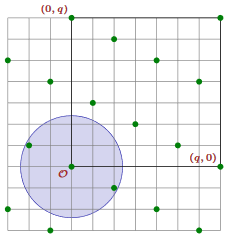

A **syndrome** $u \in \mathbb{Z}^n_q$ defines a coset
$\mathcal{L}_u^\perp(A) =  \{z \in \mathbb{Z}^m : Az = u \in \mathbb{Z}^n_q \} = t + \mathcal{L}^{\perp}(A)$ for some solution $t$

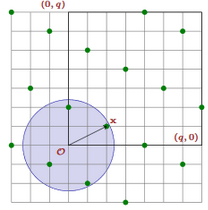

**Inhomogenous equation**

$Az = u \in \mathbb{Z}^n_q$ where $A, u$ are uniformly random and independent
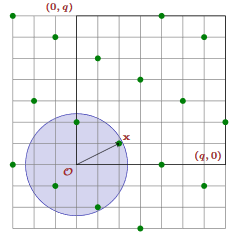

## Ajtai's one way function

- Parameters: $m, n, q \in \mathbb{Z}$, $m > n \log_2 q$
- Key: $A \in \mathbb{Z}_q^{n \times m}$
- Input: $x \in \{0, 1\}^m \Rightarrow$ Short vector
- Output: $f_A(x) = Ax \bmod q$ where $f_A : \{0, 1\}^m \to (\mathbb{Z}/q\mathbb Z)^n$


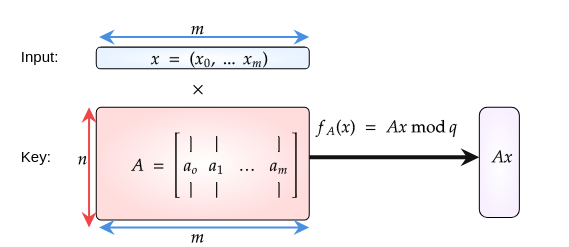
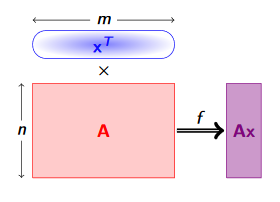

**Theorem - one way**  
If $m > n \log_2 q$ and if SVP is hard to approximate then $f_A$ is one-way

### Collision resistance

The kernel $\mathcal{L}^{\perp}(A)$ is a lattice

A collision $Ax = Ay \bmod q$  can be represented as $z = x - y \in \{-1, 0, 1\}$ s.t $Az = Ax - Ay = 0 \bmod q$ => Short solution $z$

### Cryptanalysis

> Given $A$ and $y$ find $x \in \{0, 1\}^m$ s.t $Ax = y \bmod q$

#### Solution 

Find arbitrary $t$ s.t $At = y \bmod q$

- All solutions to $Ax = y$ are of the form $t + \mathcal{L}^{\perp}$ where $\mathcal{L}^\perp(A) =  \{x \in \mathbb{Z}^m : Ax = 0 \in \mathbb{Z}^n_q \}$
- So find short vector in $t + \mathcal{L}^{\perp}(A)$
- Equivalent, find $v \in \mathcal{L}^{\perp}(A)$ closest to $t$ (CVP)

## Properties

**Compression**
- $m \to n \log_2 q$ bits

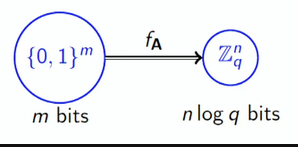

**Regularity**  
for $x_1 \neq x_2$ for a random $A, f_A(x_1), f_A(x_2)$ are **independent**  

Application: *Hiding Commitments*
- For message $M \in \{0, 1\}^m$ and random $r \in \{0, 1\}^m$
- Commitement $C(M, r) = f_{A_1, A_2}(M, r) = A_1m + A_2r$
- It hides the message since $r$ is random 
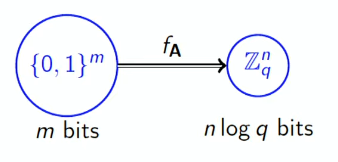

## Hardness

Finding short ($\|z\| \leq \beta \ll q$) nonzero $z \in \mathcal{L}^{\perp}(A)$ given a uniformly sampled $A \Rightarrow$  solving $GapSVP_{\beta\sqrt n}$ and $SIVP_{\beta \sqrt n}$ on *any* $n$-dim lattice

## Game approach

**Security game**  
Let $\text{SIS}_{n, m, q, \beta}$ be a problem for the following experiment:
- The challenger samples $A \overset{r}{\leftarrow} (\mathbb{Z} / q \mathbb Z)^{n\times m}$, and gives $A$ to the adversary.
- The adversary  outputs some nonzero vector $x\in (\mathbb{Z} / q \mathbb Z)^m$

We define the adversary's advantage in solving the $\text{SIS}$ problem for the set of parameters $n,m,q,\beta$ to be the probability that $A·x=0 \bmod q$ and $\|x\|_\infty \leq \beta$

**Notes**
- $n$ = security parameter => bigger $n$ => harder problem 
- $m >> n$ dependant on applications
- $q = poly(n)$ - usually $q = \mathcal{O}(n^2)$a
- $\beta << q$

**Inhomogenous**
Let $\text{ISIS}_{n, m, q, \beta}$ be a problem for the following experiment:
- The challenger samples $A \overset{r}{\leftarrow}(\mathbb{Z} / q \mathbb Z)^{n\times m}, y \overset{r}{\leftarrow} (\mathbb{Z} / q \mathbb Z)^{n}$, and gives $A, y$ to the adversary.
- The adversary  outputs some nonzero vector $x\in (\mathbb{Z} / q \mathbb Z)^m$

We define the adversary's advantage in solving the $\text{ISIS}$ problem for the set of parameters $n,m,q,\beta$ to be the probability that $A·x=y \bmod q$ and $\|x\|_\infty \leq\beta$

# Code

In [9]:
from Crypto.Util.number import long_to_bytes, bytes_to_long

In [10]:
q = random_prime(1000)
n = 5
m = 8
A = random_matrix(Zmod(q), m, n)
A

[29 23 36 17  0]
[35 13 33  9 11]
[29 23 34 36 14]
[ 7 29 21  7  7]
[26 24 15 14 10]
[33  4 10  9 33]
[ 8 34 15  0 24]
[ 1 32  4 20 13]

In [11]:
msg = b'm'
x = vector(Zmod(q), [int(i) for i in bin(bytes_to_long(msg))[2:].zfill(m)])

In [12]:
x * A

(13, 22, 22, 14, 7)

# Resources

- https://eprint.iacr.org/2015/938.pdf - SIS part
- https://en.wikipedia.org/wiki/Short_integer_solution_problem - wiki entry
- https://crypto.stanford.edu/cs355/18sp/lec9.pdf
- https://www.youtube.com/watch?v=qZIjVX61NFc&list=PLgKuh-lKre10rqiTYqJi6P4UlBRMQtPn0&index=4 + https://simons.berkeley.edu/sites/default/files/docs/14967/sis.pdf - bonus stuff
- https://crypto.stackexchange.com/questions/71591/when-does-the-sis-short-integer-solution-lattice-problem-start-becoming-easy - hardness